In [279]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [280]:
data = pd.read_csv("train.csv")
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [283]:
len(df.Ticket.unique())

681

In [284]:
df.Ticket.isnull().sum()

0

In [285]:
len(df.Ticket.value_counts())

681

In [286]:
dictionary = (df.Ticket.value_counts()).to_dict()

In [287]:
ticket_list = []
for i in dictionary:
    if dictionary[i] >=2:
        ticket_list.append(i)

In [288]:
#df.loc[df.Ticket == (ticket_list)] 
#df.loc[df.apply(lambda x: x.Ticket in ticket_list, axis=1)]
#df.loc[df.Ticket == (lambda x: x in ticket_list, axis=1)]
df_sameTickets = df.loc[df.apply(lambda x: x.Ticket in ticket_list , axis=1)]

### Eksik Verilerin Doldurulması

In [289]:
age = df["Age"]
(age.isnull()).sum()

177

In [290]:
age_filter = pd.isnull(age)
df_nullage = df[age_filter]

In [291]:
#np.where(df_nullage.Age == df_sameTickets.Age , 'True', 'False')
deneme = pd.concat([df_nullage,df_sameTickets]).drop_duplicates(keep=False)

In [292]:
pd.concat([deneme,df_sameTickets]).drop_duplicates(keep=False).Ticket.value_counts()[:13]

CA. 2343      7
4133          4
1601          3
371110        3
239853        3
370365        2
2661          2
367226        2
2668          2
376564        2
W./C. 6607    2
367230        2
2629          1
Name: Ticket, dtype: int64

In [293]:
tickets2 = ['CA. 2343',"4133","371110","239853","1601","376564","2668","367226","367230","W./C. 6607","370365","2661","312993"]

In [294]:
df[df["Ticket"] == tickets2[0]]
#df[(df == np.nan).any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [295]:
#dictdict(df_nullage.Sex.value_counts())

In [296]:
df_nullage.Embarked.value_counts()

S    90
Q    49
C    38
Name: Embarked, dtype: int64

In [297]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [298]:
#df[['Embarked','Sex']].groupby(['Sex'], as_index=False).sum()
#veri_gecici[["cinsiyet","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["cinsiyet"], as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)

In [299]:
dnmdf = pd.get_dummies(df, columns=["Embarked"])
dnmdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1,0,0


In [300]:
dnmdf[['Embarked_C','Embarked_Q','Embarked_S','Sex']].groupby(['Sex'], as_index=False).sum()

,Sex,Embarked_C,Embarked_Q,Embarked_S
0,female,73.0,36.0,203.0
1,male,95.0,41.0,441.0


In [301]:
df_nullage.Embarked.value_counts()

S    90
Q    49
C    38
Name: Embarked, dtype: int64

In [302]:
dnmdf2 = pd.get_dummies(df_nullage, columns=["Embarked","Sex"])
dnmdf2.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,0,1,0,0,1
17,18,1,2,"Williams, Mr. Charles Eugene",NaN,0,0,244373,13.0000,NaN,0,0,1,0,1
19,20,1,3,"Masselmani, Mrs. Fatima",NaN,0,0,2649,7.2250,NaN,1,0,0,1,0


In [303]:
dnmdf2[['Embarked_C','Embarked_Q','Embarked_S',"Sex_male"]].groupby(['Sex_male'], as_index=False).sum()

,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,12,24,17
1,1,26,25,73


In [304]:
dnmdf2[['Survived',"Sex_male"]].groupby(['Survived'], as_index=False).sum()

,Survived,Sex_male
0,0,108
1,1,16


In [305]:
dnmdf2[['Survived',"Sex_female"]].groupby(['Survived'], as_index=False).sum()

,Survived,Sex_female
0,0,17
1,1,36


In [306]:
df.Age.mode(),df.Age.median(),df.Age.mean(),df.Age.max(),df.Age.std()

(0    24.0
 dtype: float64,
 28.0,
 29.69911764705882,
 80.0,
 14.526497332334042)

In [307]:
dnmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB


In [308]:
#dnmdf2.loc[(dnmdf2.Sex_male == 1) & (dnmdf2.Embarked_C == 1)]
dnmdf_copy = dnmdf.copy()
age_meanCM = dnmdf.loc[(dnmdf.Sex == 'male') & dnmdf.Embarked_C == 1].Age.mean()

In [309]:
age_meanCM = int(age_meanCM)

In [310]:
dnmdf_fill= dnmdf.loc[(dnmdf.Sex == 'male') & (dnmdf.Embarked_C == 1)].copy()

In [311]:
pd.options.mode.chained_assignment = None
dnmdf_fill["Age"] = dnmdf_fill["Age"].fillna(age_meanCM)

In [312]:
#(dnmdf_fill.index)
dnmdf.loc[dnmdf.index == 26] = dnmdf_fill.loc[dnmdf_fill.index == 26]

In [313]:
for i in dnmdf_fill.index:
    dnmdf.loc[dnmdf.index == i] = dnmdf_fill.loc[dnmdf_fill.index == i]

In [314]:
dnmdf.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          740 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB


In [315]:
dnmdf_fill= dnmdf.loc[(dnmdf.Sex == 'female') & (dnmdf.Embarked_C == 1)].copy()

In [316]:
age_meanCF = dnmdf.loc[(dnmdf.Sex == 'female') & dnmdf.Embarked_C == 1].Age.mean()
age_meanCF = int(age_meanCF)
age_meanCF

28

In [317]:
dnmdf_fill["Age"] = dnmdf_fill["Age"].fillna(age_meanCF)
dnmdf_fill

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,1,0,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,NaN,1,0,0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,B78,1,0,0
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,1,0,0
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,1,0,0
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,1,0,0
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,1,0,0


In [318]:
for i in dnmdf_fill.index:
    dnmdf.loc[dnmdf.index == i] = dnmdf_fill.loc[dnmdf_fill.index == i]

In [319]:
dnmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          752 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB


In [320]:
#EmbarkedQ and Male
dnmdf_fill= dnmdf.loc[(dnmdf.Sex == 'male') & (dnmdf.Embarked_Q == 1)].copy()
age_mean = dnmdf.loc[(dnmdf.Sex == 'male') & dnmdf.Embarked_Q == 1].Age.mean()
age_mean = int(age_mean)
dnmdf_fill["Age"] = dnmdf_fill["Age"].fillna(age_mean)
for i in dnmdf_fill.index:
    dnmdf.loc[dnmdf.index == i] = dnmdf_fill.loc[dnmdf_fill.index == i]

In [321]:
dnmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          777 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB


In [322]:
#EmbarkedQ and Female
dnmdf_fill= dnmdf.loc[(dnmdf.Sex == 'female') & (dnmdf.Embarked_Q == 1)].copy()
age_mean = dnmdf.loc[(dnmdf.Sex == 'female') & dnmdf.Embarked_Q == 1].Age.mean()
age_mean = int(age_mean)
dnmdf_fill["Age"] = dnmdf_fill["Age"].fillna(age_mean)
for i in dnmdf_fill.index:
    dnmdf.loc[dnmdf.index == i] = dnmdf_fill.loc[dnmdf_fill.index == i]

In [323]:
dnmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          801 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB


In [324]:
#EmbarkedS and Male
dnmdf_fill= dnmdf.loc[(dnmdf.Sex == 'male') & (dnmdf.Embarked_Q == 1)].copy()
age_mean = dnmdf.loc[(dnmdf.Sex == 'male') & dnmdf.Embarked_Q == 1].Age.mean()
age_mean = int(age_mean)
dnmdf_fill["Age"] = dnmdf_fill["Age"].fillna(age_mean)
for i in dnmdf_fill.index:
    dnmdf.loc[dnmdf.index == i] = dnmdf_fill.loc[dnmdf_fill.index == i]

In [325]:
#EmbarkedS and Female
dnmdf_fill= dnmdf.loc[(dnmdf.Sex == 'female') & (dnmdf.Embarked_Q == 1)].copy()
age_mean = dnmdf.loc[(dnmdf.Sex == 'female') & dnmdf.Embarked_Q == 1].Age.mean()
age_mean = int(age_mean)
dnmdf_fill["Age"] = dnmdf_fill["Age"].fillna(age_mean)
for i in dnmdf_fill.index:
    dnmdf.loc[dnmdf.index == i] = dnmdf_fill.loc[dnmdf_fill.index == i]

In [326]:
#for i in dnmdf[dnmdf.Age.isnull() == True].index:
#dnmdf[dnmdf.Sex == "male"].Age.mean()/2   
dnmdf.Age.mean()   

29.586978776529335

In [327]:
#dnmdf[dnmdf.Sex == "male"].Age.quantile(0.25)
dnmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          801 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB


In [328]:
dnmdf_fill = dnmdf[(dnmdf.Age.isnull() == True) & (dnmdf.Sex == "male") & (dnmdf.Parch>=2)].copy()
age_quan = int(dnmdf[(dnmdf.Age.isnull() == False) & (dnmdf.Sex == "male") & (dnmdf.Parch>=2)].Age.quantile(0.75))
dnmdf_fill["Age"] = dnmdf_fill["Age"].fillna(age_mean)
for i in dnmdf_fill.index:
    dnmdf.loc[dnmdf.index == i] = dnmdf_fill.loc[dnmdf_fill.index == i]

In [329]:
dnmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          806 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB


In [330]:
dnmdf_fill = dnmdf[(dnmdf.Age.isnull() == True) & (dnmdf.Sex == "male") & (dnmdf.Parch<=1)].copy()
age_quan = int(dnmdf[(dnmdf.Age.isnull() == False) & (dnmdf.Sex == "male") & (dnmdf.Parch<=2)].Age.quantile(0.25))
dnmdf_fill["Age"] = dnmdf_fill["Age"].fillna(age_mean)
for i in dnmdf_fill.index:
    dnmdf.loc[dnmdf.index == i] = dnmdf_fill.loc[dnmdf_fill.index == i]

In [331]:
dnmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          874 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB


In [332]:
dnmdf_fill = dnmdf[(dnmdf.Age.isnull() == True) & (dnmdf.Sex == "female") & (dnmdf.Parch>=2)].copy()
age_quan = int(dnmdf[(dnmdf.Age.isnull() == False) & (dnmdf.Sex == "female") & (dnmdf.Parch>=2)].Age.quantile(0.75))
dnmdf_fill["Age"] = dnmdf_fill["Age"].fillna(age_mean)
for i in dnmdf_fill.index:
    dnmdf.loc[dnmdf.index == i] = dnmdf_fill.loc[dnmdf_fill.index == i]

In [333]:
dnmdf_fill = dnmdf[(dnmdf.Age.isnull() == True) & (dnmdf.Sex == "female") & (dnmdf.Parch<=1)].copy()
age_quan = int(dnmdf[(dnmdf.Age.isnull() == False) & (dnmdf.Sex == "female") & (dnmdf.Parch<=2)].Age.quantile(0.25))
dnmdf_fill["Age"] = dnmdf_fill["Age"].fillna(age_mean)
for i in dnmdf_fill.index:
    dnmdf.loc[dnmdf.index == i] = dnmdf_fill.loc[dnmdf_fill.index == i]

In [334]:
dnmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB


In [335]:
dnmdf = dnmdf.drop(['Cabin', 'Embarked_C',"Embarked_Q","Embarked_S"], axis=1).copy()

In [336]:
dnmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [337]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [338]:
dnmdf["Embarked"] = df.Embarked

In [339]:
dnmdf = dnmdf.drop(["Name"], axis=1)

In [340]:
dnmdf = dnmdf.drop(["PassengerId"], axis=1)

In [341]:
dnmdf.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.25,S


In [342]:
dict1 = {"Sex":{"male":1,"female":0},
        "Embarked":{"C":1, "Q":2, "S":3}}

dnmdf = dnmdf.replace(dict1)

In [343]:
dnmdf = dnmdf.drop(["Ticket"], axis=1)

In [344]:
dnmdf[dnmdf.isna().any(axis=1)]
dnmdf = dnmdf.drop([dnmdf.index[61],dnmdf.index[829]])

In [345]:
y = dnmdf["Survived"].values
x = dnmdf.drop(["Survived"], axis=1)

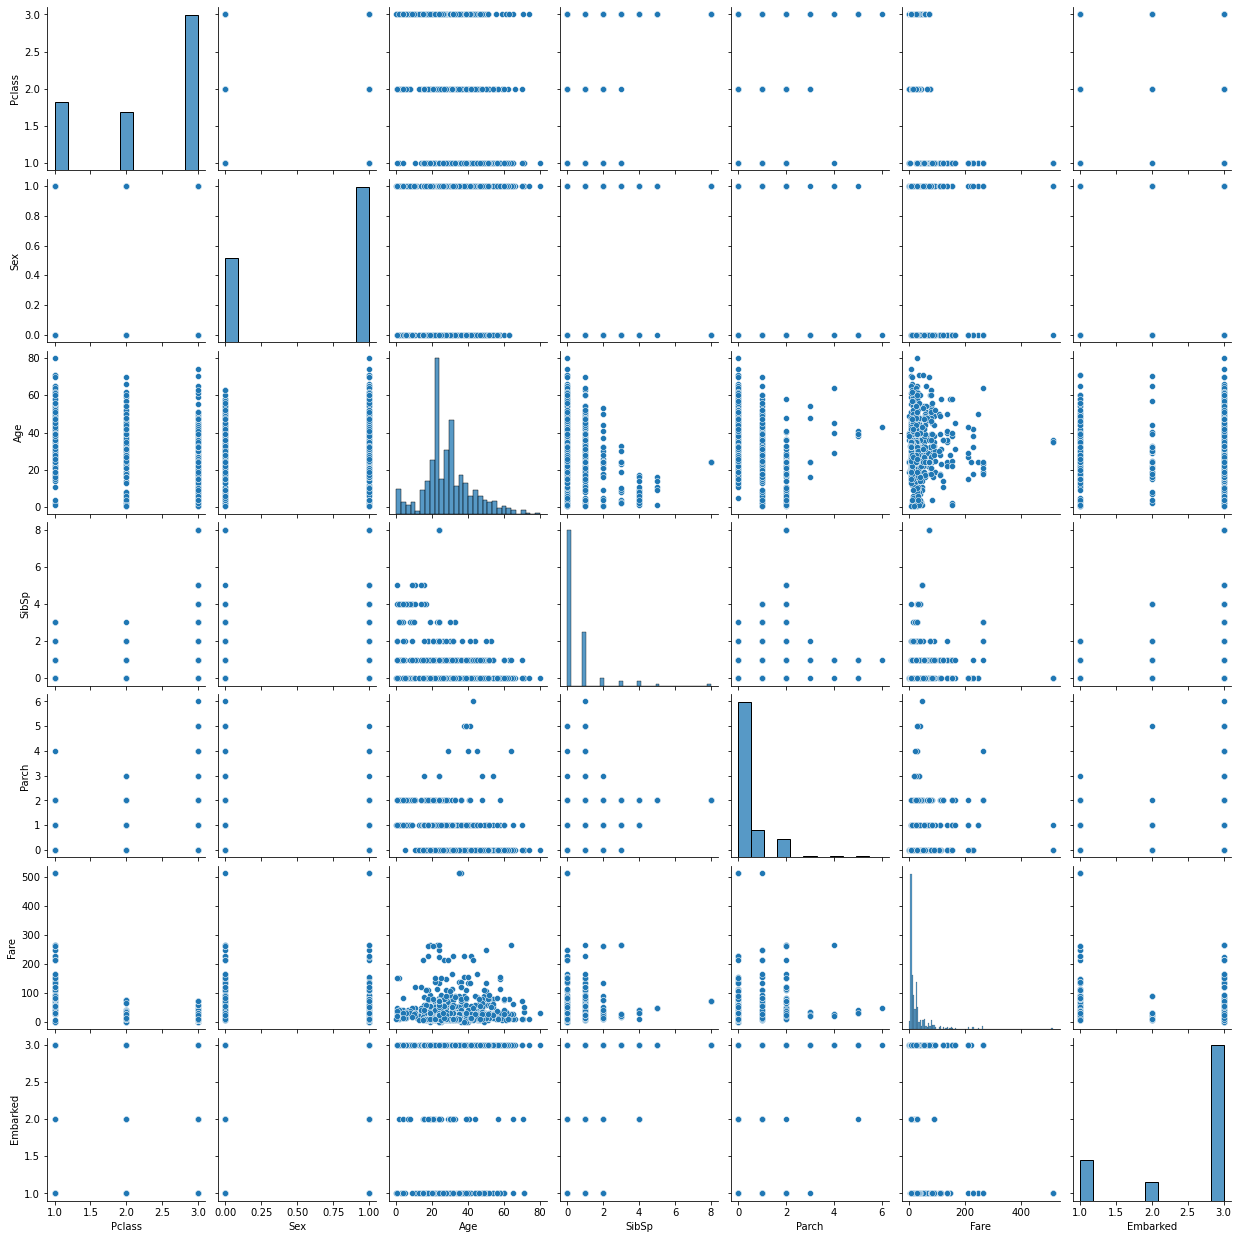

In [346]:
sns.pairplot(x)
plt.show()

In [347]:
#data2 = pd.read_csv("test.csv")
#dnmdf2 = data2.copy()
#dict1 = {"Sex":{"male":1,"female":0},
        #"Embarked":{"C":1, "Q":2, "S":3}}

#dnmdf2 = dnmdf2.replace(dict1)
#dnmdf2 = dnmdf2.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)

x_train = x 
y_train = y

In [348]:
data2 = pd.read_csv("test.csv")
dnmdf2 = data2.copy()

In [349]:
#dnmdf2 = dnmdf2.drop(dnmdf2[dnmdf2.isna().any(axis=1)].index)

In [350]:
dnmdf2 = dnmdf2.drop("Cabin", axis=1)

In [351]:
dnmdf2[dnmdf2.isna().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 10 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Pclass       87 non-null     int64  
 2   Name         87 non-null     object 
 3   Sex          87 non-null     object 
 4   Age          1 non-null      float64
 5   SibSp        87 non-null     int64  
 6   Parch        87 non-null     int64  
 7   Ticket       87 non-null     object 
 8   Fare         86 non-null     float64
 9   Embarked     87 non-null     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ KB


In [352]:
dnmdf2[dnmdf2.Age.isnull()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [353]:
dnmdf2.Ticket.value_counts()

PC 17608    5
113503      4
CA. 2343    4
220845      3
16966       3
           ..
349909      1
19924       1
363611      1
113791      1
3101266     1
Name: Ticket, Length: 363, dtype: int64

In [354]:
dnmdf2[dnmdf2.Ticket == 'PC 17608']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.375,C
59,951,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.375,C
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.375,C
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.375,C
375,1267,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.375,C


In [355]:
(dnmdf2[dnmdf2.Sex == "male"]).Age.describe()

count    205.000000
mean      30.272732
std       13.389528
min        0.330000
25%       22.000000
50%       27.000000
75%       40.000000
max       67.000000
Name: Age, dtype: float64

In [356]:
dnmdf2.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


In [357]:
#PClass=3
mean = int(dnmdf2[(dnmdf2.Pclass == 3) & (dnmdf2.Sex=="female")].Age.mean())
dnmdf_fill = dnmdf2[(dnmdf2.Pclass == 3) & (dnmdf2.Sex=="female") & (dnmdf2.Age.isnull() == True)]
dnmdf_fill["Age"] = dnmdf_fill["Age"].fillna(mean)
for i in dnmdf_fill.index:
    dnmdf2.loc[dnmdf2.index == i] = dnmdf_fill.loc[dnmdf_fill.index == i]

In [358]:
mean = int(dnmdf2[(dnmdf2.Pclass == 3) & (dnmdf2.Sex=="male")].Age.mean())
dnmdf_fill = dnmdf2[(dnmdf2.Pclass == 3) & (dnmdf2.Sex=="male") & (dnmdf2.Age.isnull() == True)]
dnmdf_fill["Age"] = dnmdf_fill["Age"].fillna(mean)
for i in dnmdf_fill.index:
    dnmdf2.loc[dnmdf2.index == i] = dnmdf_fill.loc[dnmdf_fill.index == i]

In [359]:
#PClass = 2
mean = int(dnmdf2[(dnmdf2.Pclass == 2) & (dnmdf2.Sex=="female")].Age.mean())
dnmdf_fill = dnmdf2[(dnmdf2.Pclass == 2) & (dnmdf2.Sex=="female") & (dnmdf2.Age.isnull() == True)]
dnmdf_fill["Age"] = dnmdf_fill["Age"].fillna(mean)
for i in dnmdf_fill.index:
    dnmdf2.loc[dnmdf2.index == i] = dnmdf_fill.loc[dnmdf_fill.index == i]

In [360]:
mean = int(dnmdf2[(dnmdf2.Pclass == 2) & (dnmdf2.Sex=="male")].Age.mean())
dnmdf_fill = dnmdf2[(dnmdf2.Pclass == 2) & (dnmdf2.Sex=="male") & (dnmdf2.Age.isnull() == True)]
dnmdf_fill["Age"] = dnmdf_fill["Age"].fillna(mean)
for i in dnmdf_fill.index:
    dnmdf2.loc[dnmdf2.index == i] = dnmdf_fill.loc[dnmdf_fill.index == i]

In [361]:
#PClass = 1
mean = int(dnmdf2[(dnmdf2.Pclass == 1) & (dnmdf2.Sex=="female")].Age.mean())
dnmdf_fill = dnmdf2[(dnmdf2.Pclass == 1) & (dnmdf2.Sex=="female") & (dnmdf2.Age.isnull() == True)]
dnmdf_fill["Age"] = dnmdf_fill["Age"].fillna(mean)
for i in dnmdf_fill.index:
    dnmdf2.loc[dnmdf2.index == i] = dnmdf_fill.loc[dnmdf_fill.index == i]

In [362]:
mean = int(dnmdf2[(dnmdf2.Pclass == 1) & (dnmdf2.Sex=="male")].Age.mean())
dnmdf_fill = dnmdf2[(dnmdf2.Pclass == 1) & (dnmdf2.Sex=="male") & (dnmdf2.Age.isnull() == True)]
dnmdf_fill["Age"] = dnmdf_fill["Age"].fillna(mean)
for i in dnmdf_fill.index:
    dnmdf2.loc[dnmdf2.index == i] = dnmdf_fill.loc[dnmdf_fill.index == i]

In [363]:
dnmdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [364]:
dnmdf2[dnmdf2.isnull().any(axis=1)].Fare.fillna(25)

152    25.0
Name: Fare, dtype: float64

In [365]:
fare = dnmdf2[(dnmdf2.Pclass==3) & (dnmdf2.Sex=="male") & (dnmdf2.Age>30)].Fare.quantile(0.75)

In [366]:
dnmdf2[dnmdf2.isnull().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [367]:
dnmdf_fill = dnmdf2[dnmdf2.Ticket=='3701']
dnmdf_fill["Fare"] = dnmdf_fill["Age"].fillna(fare)
for i in dnmdf_fill.index:
    dnmdf2.loc[dnmdf2.index == i] = dnmdf_fill.loc[dnmdf_fill.index == i]

In [368]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [369]:
grid = {'penalty':['l1', 'l2', 'elasticnet', 'none']}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv = 10, verbose=3)
logreg_cv.fit(x,y)
print("En iyi hiperparametreler..:",logreg_cv.best_params_)
print("En iyi hiperparametrelere göre en iyi doğruluk değeri..:",logreg_cv.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] penalty=l1 ......................................................
[CV] ............................ penalty=l1, score=nan, total=   0.0s
[CV] penalty=l1 ......................................................
[CV] ............................ penalty=l1, score=nan, total=   0.0s
[CV] penalty=l1 ......................................................
[CV] ............................ penalty=l1, score=nan, total=   0.0s
[CV] penalty=l1 ......................................................
[CV] ............................ penalty=l1, score=nan, total=   0.0s
[CV] penalty=l1 ......................................................
[CV] ............................ penalty=l1, score=nan, total=   0.0s
[CV] penalty=l1 ......................................................
[CV] ............................ penalty=l1, score=nan, total=   0.0s
[CV] penalty=l1 ......................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Seyma\anaconda3\envs\kod\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Seyma\anaconda3\envs\kod\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Seyma\anaconda3\envs\kod\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Seyma\anaconda3\envs\kod\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 o

[CV] .......................... penalty=l2, score=0.798, total=   0.1s
[CV] penalty=l2 ......................................................
[CV] .......................... penalty=l2, score=0.753, total=   0.1s
[CV] penalty=l2 ......................................................
[CV] .......................... penalty=l2, score=0.831, total=   0.1s
[CV] penalty=l2 ......................................................
[CV] .......................... penalty=l2, score=0.798, total=   0.0s
[CV] penalty=l2 ......................................................


C:\Users\Seyma\anaconda3\envs\kod\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .......................... penalty=l2, score=0.775, total=   0.1s
[CV] penalty=l2 ......................................................
[CV] .......................... penalty=l2, score=0.775, total=   0.1s
[CV] penalty=l2 ......................................................
[CV] .......................... penalty=l2, score=0.775, total=   0.1s
[CV] penalty=l2 ......................................................
[CV] .......................... penalty=l2, score=0.831, total=   0.1s

C:\Users\Seyma\anaconda3\envs\kod\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Seyma\anaconda3\envs\kod\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model


[CV] penalty=l2 ......................................................
[CV] .......................... penalty=l2, score=0.841, total=   0.1s
[CV] penalty=elasticnet ..............................................
[CV] .................... penalty=elasticnet, score=nan, total=   0.0s
[CV] penalty=elasticnet ..............................................
[CV] .................... penalty=elasticnet, score=nan, total=   0.0s
[CV] penalty=elasticnet ..............................................
[CV] .................... penalty=elasticnet, score=nan, total=   0.0s
[CV] penalty=elasticnet ..............................................
[CV] .................... penalty=elasticnet, score=nan, total=   0.0s
[CV] penalty=elasticnet ..............................................
[CV] .................... penalty=elasticnet, score=nan, total=   0.0s
[CV] penalty=elasticnet ..............................................
[CV] .................... penalty=elasticnet, score=nan, total=   0.0s
[CV] 

C:\Users\Seyma\anaconda3\envs\kod\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Seyma\anaconda3\envs\kod\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

[CV] ........................ penalty=none, score=0.775, total=   0.1s
[CV] penalty=none ....................................................
[CV] ........................ penalty=none, score=0.775, total=   0.1s
[CV] penalty=none ....................................................
[CV] ........................ penalty=none, score=0.831, total=   0.0s
[CV] penalty=none ....................................................
[CV] ........................ penalty=none, score=0.830, total=   0.0s
En iyi hiperparametreler..: {'penalty': 'l2'}
En iyi hiperparametrelere göre en iyi doğruluk değeri..: 0.7964504596527069


C:\Users\Seyma\anaconda3\envs\kod\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Seyma\anaconda3\envs\kod\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

In [370]:
index = dnmdf2.PassengerId
dnmdf2 = dnmdf2.drop(['PassengerId','Name','Ticket'],axis=1)

In [371]:
dict1 = {"Sex":{"male":1,"female":0},
        "Embarked":{"C":1, "Q":2, "S":3}}

dnmdf2 = dnmdf2.replace(dict1)

In [372]:
y_pred=logreg_cv.predict(dnmdf2)

In [373]:
dict1 = {"PassengerId":index,
        "Survived":y_pred}

In [374]:
pred_df = pd.DataFrame(data=dict1)
pred_df.to_csv('prediction.csv', index=False)

In [375]:
pred_df_deneme = pd.read_csv("prediction.csv", index_col=0)

In [376]:
pred_df_deneme

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [377]:
index

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64